## Modelling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
df_for_modelling = pd.read_csv('fifa19\data.csv')

### Dropping unecessary values

In [25]:
drop_cols = df_for_modelling.columns[28:54]
df_for_modelling = df_for_modelling.drop(drop_cols, axis = 1)
df_for_modelling = df_for_modelling.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df_for_modelling = df_for_modelling.dropna()
df_for_modelling.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [27]:
df_for_modelling1.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0,5,1
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1,5,1
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,4,1
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,1,0,1
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,1,3,1


In [26]:
#Turn Real Face into a binary indicator variable
def face_to_num(df_for_modelling):
    if (df_for_modelling['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
def right_footed(df_for_modelling):
    if (df_for_modelling['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0
    
def simple_position(df_for_modelling):
    if (df_for_modelling['Position'] == 'GK'):
        return 0
    elif ((df_for_modelling['Position'] == 'RB') | (df_for_modelling['Position'] == 'LB') | (df_for_modelling['Position'] == 'CB') | (df_for_modelling['Position'] == 'LCB') | (df_for_modelling['Position'] == 'RCB') | (df_for_modelling['Position'] == 'RWB') | (df_for_modelling['Position'] == 'LWB') ):
        return 1
    elif ((df_for_modelling['Position'] == 'LDM') | (df_for_modelling['Position'] == 'CDM') | (df_for_modelling['Position'] == 'RDM')):
        return 2
    elif ((df_for_modelling['Position'] == 'LM') | (df_for_modelling['Position'] == 'LCM') | (df_for_modelling['Position'] == 'CM') | (df_for_modelling['Position'] == 'RCM') | (df_for_modelling['Position'] == 'RM')):
        return 3
    elif ((df_for_modelling['Position'] == 'LAM') | (df_for_modelling['Position'] == 'CAM') | (df_for_modelling['Position'] == 'RAM') | (df_for_modelling['Position'] == 'LW') | (df_for_modelling['Position'] == 'RW')):
        return 4
    elif ((df_for_modelling['Position'] == 'RS') | (df_for_modelling['Position'] == 'ST') | (df_for_modelling['Position'] == 'LS') | (df_for_modelling['Position'] == 'CF') | (df_for_modelling['Position'] == 'LF') | (df_for_modelling['Position'] == 'RF')):
        return 5
    else:
        return df_for_modelling.Position

    
#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df_for_modelling.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df_for_modelling):
    if (df_for_modelling.Nationality in nat_list):
        return 1
    else:
        return 0
    
df_for_modelling1 = df_for_modelling.copy()
df_for_modelling1['Real_Face'] = df_for_modelling1.apply(face_to_num, axis=1)
df_for_modelling1['Right_Foot'] = df_for_modelling1.apply(right_footed, axis=1)
df_for_modelling1['Simple_Position'] = df_for_modelling1.apply(simple_position,axis = 1)
df_for_modelling1['Major_Nation'] = df_for_modelling1.apply(major_nation,axis = 1)

In [28]:
#Drop original columns used
df_for_modelling1 = df_for_modelling1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df_for_modelling1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0,5,1
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1,5,1
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,4,1
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,1,0,1
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,1,3,1


In [29]:
#Split ID as a Target value
target = df_for_modelling1.Overall
df_for_modelling2 = df_for_modelling1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_for_modelling2, target, test_size=0.2)

In [31]:
y_train.head()

4663     71
6823     68
2473     74
12460    63
15017    60
Name: Overall, dtype: int64

In [ ]:
#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

In [ ]:
df_for_modelling.head()

In [ ]:
pd.get_dummies(X_train)

In [39]:
X_test.head()

,Age,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation
3657,24,77,1.0,3.0,3.0,34.0,75.0,73.0,60.0,61.0,64.0,66.0,28.0,24.0,69.0,68.0,65.0,55.0,68.0,48.0,75.0,74.0,74.0,85.0,62.0,66.0,16.0,74.0,40.0,62.0,70.0,34.0,15.0,24.0,5.0,7.0,7.0,8.0,5.0,0,1,5,1
14164,23,68,1.0,3.0,1.0,10.0,7.0,14.0,28.0,7.0,6.0,13.0,12.0,28.0,12.0,17.0,26.0,33.0,55.0,35.0,17.0,44.0,17.0,57.0,5.0,26.0,13.0,5.0,31.0,13.0,39.0,23.0,11.0,11.0,60.0,60.0,59.0,61.0,63.0,0,1,0,1
836,27,78,2.0,4.0,3.0,76.0,68.0,41.0,81.0,65.0,78.0,78.0,69.0,75.0,81.0,70.0,65.0,82.0,74.0,88.0,76.0,77.0,94.0,48.0,76.0,56.0,69.0,72.0,77.0,76.0,79.0,72.0,66.0,59.0,16.0,14.0,16.0,14.0,14.0,0,1,3,0
9441,28,66,1.0,3.0,3.0,58.0,62.0,55.0,63.0,55.0,64.0,52.0,49.0,62.0,70.0,67.0,62.0,82.0,65.0,84.0,58.0,82.0,65.0,55.0,61.0,59.0,66.0,70.0,67.0,54.0,60.0,43.0,62.0,60.0,11.0,12.0,14.0,14.0,5.0,0,0,3,1
14549,19,73,1.0,2.0,2.0,40.0,31.0,55.0,59.0,32.0,38.0,33.0,28.0,51.0,49.0,59.0,54.0,60.0,49.0,56.0,45.0,84.0,54.0,71.0,28.0,51.0,51.0,31.0,38.0,42.0,54.0,64.0,64.0,62.0,11.0,5.0,13.0,8.0,6.0,0,0,1,1


## Prediction using Decision Trees

In [48]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([70., 59., 77., ..., 64., 75., 71.])

In [49]:
predictions.size

3630

In [51]:
print(model.score(X_test, y_test))

0.927736700641246


In [ ]:
#Finding the r2 score and root mezzan squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

In [ ]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions 

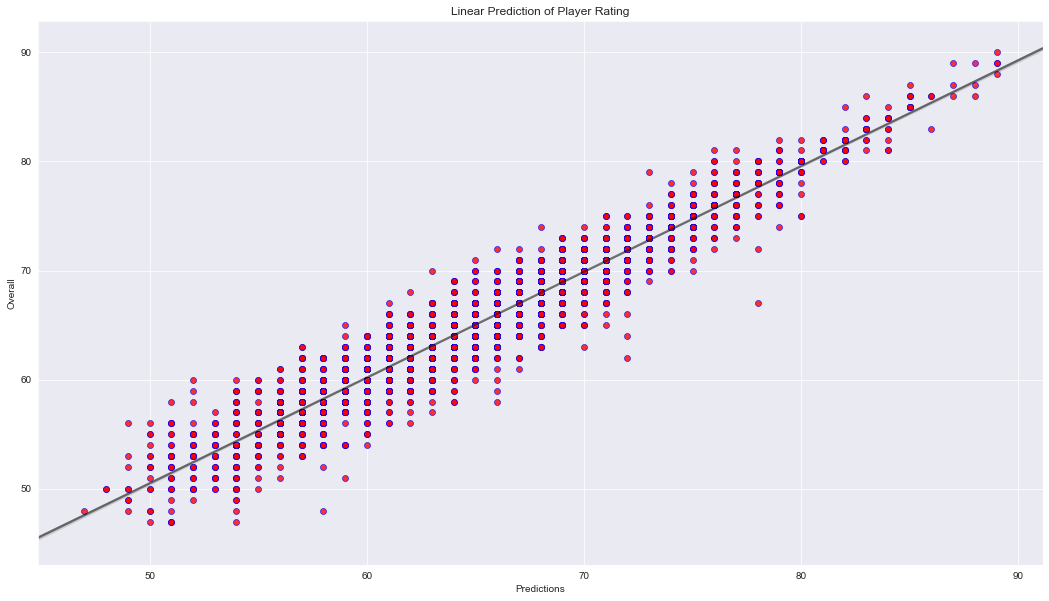

In [42]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

## Prediction using KNN regressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors= 3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [32]:
predictions = model.predict(X_test)
predictions

array([69., 59., 78., ..., 64., 75., 71.])

In [47]:
print(model.score(X_test, y_test))

0.930187242028137
